Here we show how to use compute the entropy and otoc of a circuit, distributed over multiple cores.

In [1]:
import stim
import matplotlib.pyplot as plt
from supercliffords.circuits import ThreeQuarterCircuit
from supercliffords.gates import C3

# Build the circuit class:
n_qubits = 120
slow = 10
circuit = ThreeQuarterCircuit(n_qubits, slow)

Next, prepare the parameters for simulation, including the parameter n_jobs that specifies how many cores to use.

In [2]:
t = 200
cut = 40
res = 1
rep = 100
n_jobs = 20

S, ts = circuit.compute_entropy_parallel(t, cut, res, rep, n_jobs)

Plot the results:

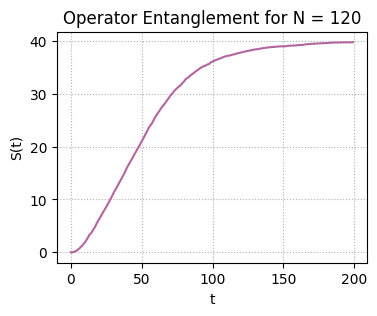

In [3]:
plt.figure(figsize=(4, 3))
plt.plot(ts, S, color="#b3669e")
plt.xlabel("t")
plt.ylabel("S(t)")
plt.title(f"Operator Entanglement for N = {n_qubits}")
plt.grid(linestyle="dotted")
plt.show()

We can also do the out-of-time ordered correlator calculation in parallel.

In [4]:
s = stim.TableauSimulator()
c = stim.Circuit()
c.append_operation(
    "I", [n_qubits - 1]
)  # Need to initialize the tableau with correct number of qubits, otherwise otoc calculation will fail.
s.do(c)
s.do(C3(0, 1, 2))

otoc, ts = circuit.compute_otoc_parallel(t, res, rep, s, n_jobs)

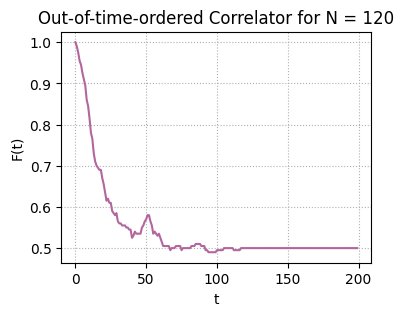

In [5]:
plt.figure(figsize=(4, 3))
plt.plot(ts, otoc, color="#b3669e")
plt.xlabel("t")
plt.ylabel("F(t)")
plt.title(f"Out-of-time-ordered Correlator for N = {n_qubits}")
plt.grid(linestyle="dotted")
plt.show()